### Importación de datos



In [25]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

#1. Análisis de facturación



In [26]:
factTienda1 = tienda1['Precio'].sum()
factTienda2 = tienda2['Precio'].sum()
factTienda3 = tienda3['Precio'].sum()
factTienda4 = tienda4['Precio'].sum()

print(f"Total ingresos tienda 1: ${factTienda1:,}")
print(f"Total ingresos tienda 2: ${factTienda2:,}")
print(f"Total ingresos tienda 3: ${factTienda3:,}")
print(f"Total ingresos tienda 4: ${factTienda4:,}")

Total ingresos tienda 1: $1,150,880,400.0
Total ingresos tienda 2: $1,116,343,500.0
Total ingresos tienda 3: $1,098,019,600.0
Total ingresos tienda 4: $1,038,375,700.0


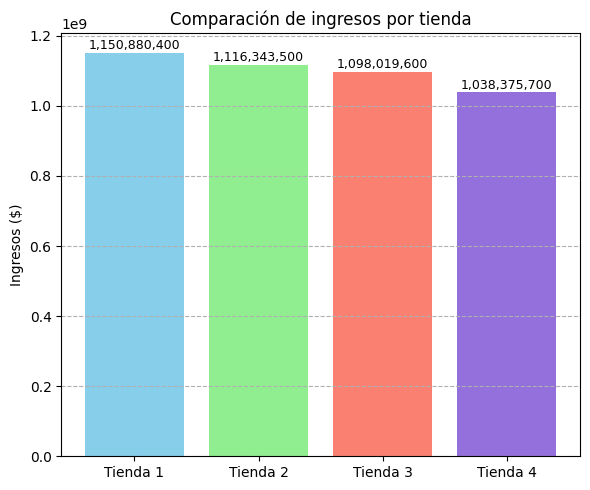

In [70]:
from matplotlib import pyplot as plt

tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
facturaciones = [factTienda1, factTienda2, factTienda3, factTienda4]


plt.figure(figsize=(6,5))

barras = plt.bar(tiendas, facturaciones, color=['skyblue', 'lightgreen', 'salmon', 'mediumpurple'])
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura + 2_000_000,
        f'{int(altura):,}',  # formatea con puntos
        ha='center', va='bottom', fontsize=9
    )
plt.title('Comparación de ingresos por tienda')
plt.ylabel('Ingresos ($)')
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--')
plt.show()

In [131]:
#ticket promedio

ticket_promedio_tienda1 = factTienda1/tienda1['Precio'].count()
ticket_promedio_tienda2 = factTienda2/tienda2['Precio'].count()
ticket_promedio_tienda3 = factTienda3/tienda3['Precio'].count()
ticket_promedio_tienda4 = factTienda4/tienda4['Precio'].count()
print(f"El ticket promedio de la Tienda 1 es: ${ticket_promedio_tienda1:,.2f}")
print(f"El ticket promedio de la Tienda 2 es: ${ticket_promedio_tienda2:,.2f}")
print(f"El ticket promedio de la Tienda 3 es: ${ticket_promedio_tienda3:,.2f}")
print(f"El ticket promedio de la Tienda 4 es: ${ticket_promedio_tienda4:,.2f}")

El ticket promedio de la Tienda 1 es: $487,867.91
El ticket promedio de la Tienda 2 es: $473,227.43
El ticket promedio de la Tienda 3 es: $465,459.77
El ticket promedio de la Tienda 4 es: $440,362.89


# 2. Ventas por categoría

In [46]:
tienda_por_categoria = tienda1.groupby('Categoría del Producto').agg({
  'Producto': 'count',
  'Precio': 'sum'
}).reset_index()
tienda_por_categoria = tienda_por_categoria.rename(columns={'Producto': 'Ventas'}).sort_values(by='Precio', ascending=False)
tienda_por_categoria

,Categoría del Producto,Ventas,Precio
3,Electrónicos,448,429493500.0
2,Electrodomésticos,312,363685200.0
7,Muebles,465,187633700.0
4,Instrumentos musicales,182,91299000.0
1,Deportes y diversión,284,39290000.0
5,Juguetes,324,17995700.0
0,Artículos para el hogar,171,12698400.0
6,Libros,173,8784900.0


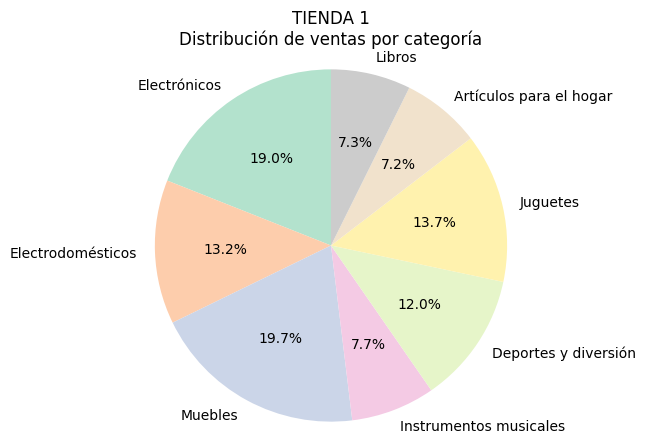

In [47]:
categorias = tienda_por_categoria['Categoría del Producto']
cant_ventas = tienda_por_categoria['Ventas']

plt.figure(figsize=(5, 5))
plt.pie(cant_ventas, labels=categorias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
plt.title('TIENDA 1\nDistribución de ventas por categoría')
plt.axis('equal')
plt.show()

In [30]:
tienda2_por_categoria = tienda2.groupby('Categoría del Producto').agg({
  'Producto': 'count',
  'Precio': 'sum'
}).reset_index()
tienda2_por_categoria = tienda2_por_categoria.rename(columns={'Producto': 'Ventas'}).sort_values(by='Precio', ascending=False)
tienda2_por_categoria

,Categoría del Producto,Ventas,Precio
3,Electrónicos,422,410831100.0
2,Electrodomésticos,305,348567800.0
7,Muebles,442,176426300.0
4,Instrumentos musicales,224,104990300.0
1,Deportes y diversión,275,34744500.0
5,Juguetes,313,15945400.0
0,Artículos para el hogar,181,14746900.0
6,Libros,197,10091200.0


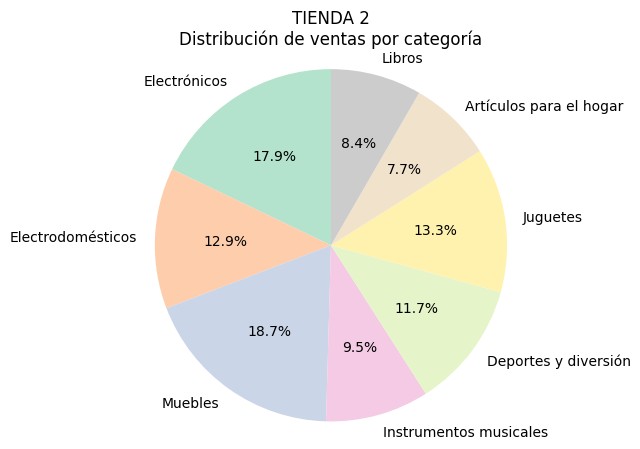

In [31]:
categorias = tienda2_por_categoria['Categoría del Producto']
cant_ventas = tienda2_por_categoria['Ventas']

plt.figure(figsize=(5, 5))
plt.pie(cant_ventas, labels=categorias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
plt.title('TIENDA 2\nDistribución de ventas por categoría')
plt.axis('equal')
plt.show()

In [32]:
tienda3_por_categoria = tienda3.groupby('Categoría del Producto').agg({
  'Producto': 'count',
  'Precio': 'sum'
}).reset_index()
tienda3_por_categoria = tienda3_por_categoria.rename(columns={'Producto': 'Ventas'}).sort_values(by='Precio', ascending=False)
tienda3_por_categoria

,Categoría del Producto,Ventas,Precio
3,Electrónicos,451,410775800.0
2,Electrodomésticos,278,329237900.0
7,Muebles,499,201072100.0
4,Instrumentos musicales,177,77380900.0
1,Deportes y diversión,277,35593100.0
5,Juguetes,315,19401100.0
0,Artículos para el hogar,177,15060000.0
6,Libros,185,9498700.0


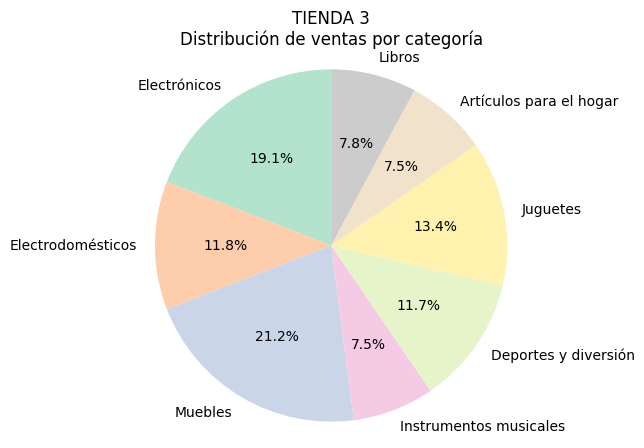

In [33]:
categorias = tienda3_por_categoria['Categoría del Producto']
cant_ventas = tienda3_por_categoria['Ventas']

plt.figure(figsize=(5, 5))
plt.pie(cant_ventas, labels=categorias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
plt.title('TIENDA 3\nDistribución de ventas por categoría')
plt.axis('equal')
plt.show()

In [34]:
tienda4_por_categoria = tienda4.groupby('Categoría del Producto').agg({
  'Producto': 'count',
  'Precio': 'sum'
}).reset_index()
tienda4_por_categoria = tienda4_por_categoria.rename(columns={'Producto': 'Ventas'}).sort_values(by='Ventas', ascending=False)
tienda4_por_categoria

,Categoría del Producto,Ventas,Precio
7,Muebles,480,192528900.0
3,Electrónicos,451,409476100.0
5,Juguetes,338,20262200.0
1,Deportes y diversión,277,33350100.0
2,Electrodomésticos,254,283260200.0
0,Artículos para el hogar,201,15074500.0
6,Libros,187,9321300.0
4,Instrumentos musicales,170,75102400.0


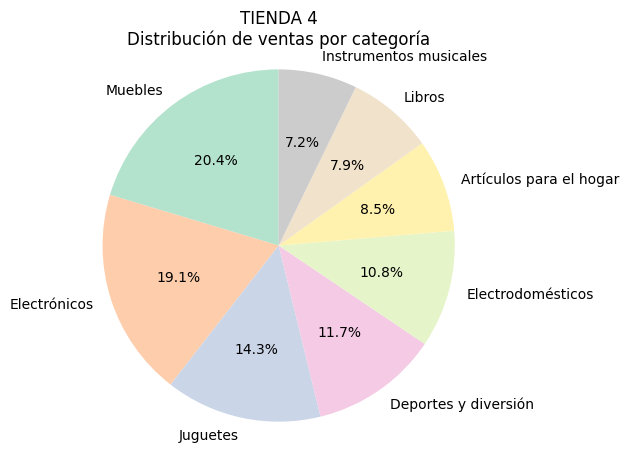

In [54]:
categorias = tienda4_por_categoria['Categoría del Producto']
cant_ventas = tienda4_por_categoria['Ventas']

plt.figure(figsize=(5, 5))
plt.pie(cant_ventas, labels=categorias, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
plt.title('TIENDA 4\nDistribución de ventas por categoría')
plt.axis('equal')
plt.show()

# 3. Calificación promedio de la tienda


In [36]:
tienda1_calificacion = tienda.groupby('Categoría del Producto').agg({
  'Calificación': 'mean'
}).reset_index()
tienda1_calificacion['Calificación'] = tienda1_calificacion['Calificación'].round(2)
tienda1_calificacion = tienda1_calificacion.sort_values(by='Calificación', ascending=False)
tienda1_calificacion

,Categoría del Producto,Calificación
1,Deportes y diversión,4.05
6,Libros,4.04
3,Electrónicos,4.01
0,Artículos para el hogar,4.01
7,Muebles,4.00
5,Juguetes,3.99
2,Electrodomésticos,3.93
4,Instrumentos musicales,3.91


In [37]:
tienda2_calificacion = tienda2.groupby('Categoría del Producto').agg({
  'Calificación': 'mean'
}).reset_index()
tienda2_calificacion['Calificación'] = tienda2_calificacion['Calificación'].round(2)
tienda2_calificacion = tienda2_calificacion.sort_values(by='Calificación', ascending=False)
tienda2_calificacion

,Categoría del Producto,Calificación
7,Muebles,4.09
0,Artículos para el hogar,4.07
2,Electrodomésticos,4.07
1,Deportes y diversión,4.07
4,Instrumentos musicales,4.04
5,Juguetes,4.03
3,Electrónicos,3.97
6,Libros,3.95


In [38]:
tienda3_calificacion = tienda3.groupby('Categoría del Producto').agg({
  'Calificación': 'mean'
}).reset_index()
tienda3_calificacion['Calificación'] = tienda3_calificacion['Calificación'].round(2)
tienda3_calificacion = tienda3_calificacion.sort_values(by='Calificación', ascending=False)
tienda3_calificacion


,Categoría del Producto,Calificación
5,Juguetes,4.20
7,Muebles,4.10
0,Artículos para el hogar,4.07
6,Libros,4.05
2,Electrodomésticos,4.01
4,Instrumentos musicales,4.01
3,Electrónicos,3.99
1,Deportes y diversión,3.94


In [39]:
tienda4_calificacion = tienda4.groupby('Categoría del Producto').agg({
  'Calificación': 'mean'
}).reset_index()
tienda4_calificacion['Calificación'] = tienda4_calificacion['Calificación'].round(2)
tienda4_calificacion = tienda4_calificacion.sort_values(by='Calificación', ascending=False)
tienda4_calificacion


,Categoría del Producto,Calificación
1,Deportes y diversión,4.05
6,Libros,4.04
3,Electrónicos,4.01
0,Artículos para el hogar,4.01
7,Muebles,4.00
5,Juguetes,3.99
2,Electrodomésticos,3.93
4,Instrumentos musicales,3.91


In [119]:
calif_total_tienda1 = round(tienda1['Calificación'].mean(), 2)
calif_total_tienda2 = round(tienda2['Calificación'].mean(), 2)
calif_total_tienda3 = round(tienda3['Calificación'].mean(), 2)
calif_total_tienda4 = round(tienda4['Calificación'].mean(), 2)
print(f"La calificacion promedio de la Tienda 1 es: {calif_total_tienda1}")
print(f"La calificacion promedio de la Tienda 2 es: {calif_total_tienda2}")
print(f"La calificacion promedio de la Tienda 3 es: {calif_total_tienda3}")
print(f"La calificacion promedio de la Tienda 4 es: {calif_total_tienda4}")

La calificacion promedio de la Tienda 1 es: 3.98
La calificacion promedio de la Tienda 2 es: 4.04
La calificacion promedio de la Tienda 3 es: 4.05
La calificacion promedio de la Tienda 4 es: 4.0


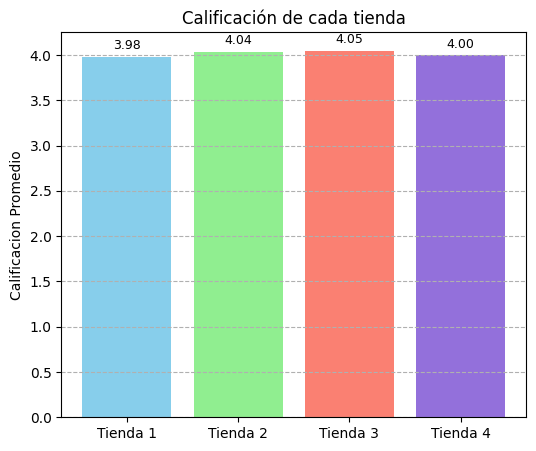

In [75]:
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
calificaciones = [calif_total_tienda1, calif_total_tienda2, calif_total_tienda3, calif_total_tienda4]

plt.figure(figsize=(6,5))
barras = plt.bar(tiendas, calificaciones, color=['skyblue', 'lightgreen', 'salmon', 'mediumpurple'])
for barra in barras:
    altura = barra.get_height()
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        altura + 0.05,  # Position the text slightly above the bar
        f'{altura:.2f}',  # Format with 2 decimal places
        ha='center', va='bottom', fontsize=9
    )

plt.title('Calificación de cada tienda')
plt.ylabel('Calificacion Promedio')
plt.grid(True, axis='y', linestyle='--')
plt.show()

# 4. Productos más y menos vendidos

In [109]:
for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4], start=1):
  tienda_producto = tienda.groupby('Producto').agg({
    'Producto': 'count',

  })

  tienda_producto = tienda_producto.rename(columns={'Producto': 'Cantidad'}).sort_values(by='Cantidad', ascending=False)

  producto_max = tienda_producto.head(3)
  producto_min = tienda_producto.tail(3).sort_values(by='Cantidad', ascending=True)

  print(f'TIENDA {i}\nProducto MÁS vendido:\n {producto_max}')
  print(f'Producto MENOS vendido:\n {producto_min}\n\n')

TIENDA 1
Producto MÁS vendido:
                Cantidad
Producto               
Armario              60
TV LED UHD 4K        60
Microondas           60
Producto MENOS vendido:
                            Cantidad
Producto                           
Celular ABXY                     33
Auriculares con micrófono        33
Olla de presión                  35


TIENDA 2
Producto MÁS vendido:
                            Cantidad
Producto                           
Iniciando en programación        65
Microondas                       62
Batería                          61
Producto MENOS vendido:
                  Cantidad
Producto                 
Juego de mesa          32
Impresora              34
Mesa de comedor        34


TIENDA 3
Producto MÁS vendido:
                  Cantidad
Producto                 
Kit de bancas          57
Mesa de comedor        56
Cama king              56
Producto MENOS vendido:
                          Cantidad
Producto                         
Bloques de constr

# 5. Envío promedio por tienda

In [122]:
costo_envio_tienda1 = tienda1['Costo de envío'].sum()
costo_envio_tienda2 = tienda2['Costo de envío'].sum()
costo_envio_tienda3 = tienda3['Costo de envío'].sum()
costo_envio_tienda4 = tienda4['Costo de envío'].sum()

costo_prom_envio_tienda1 = round(tienda1['Costo de envío'].mean(), 2)
costo_prom_envio_tienda2 = round(tienda2['Costo de envío'].mean(), 2)
costo_prom_envio_tienda3 = round(tienda3['Costo de envío'].mean(), 2)
costo_prom_envio_tienda4 = round(tienda4['Costo de envío'].mean(), 2)

print(f"El gasto total de envios de la Tienda 1 es: ${costo_envio_tienda1:,} con un promedio de ${costo_prom_envio_tienda1:,} por envío")
print(f"El gasto total de envios de la Tienda 2 es: ${costo_envio_tienda2:,} con un promedio de ${costo_prom_envio_tienda2:,} por envío")
print(f"El gasto total de envios de la Tienda 3 es: ${costo_envio_tienda3:,} con un promedio de ${costo_prom_envio_tienda3:,} por envío")
print(f"El gasto total de envios de la Tienda 4 es: ${costo_envio_tienda4:,} con un promedio de ${costo_prom_envio_tienda4:,} por envío")

El gasto total de envios de la Tienda 1 es: $61,377,900.0 con un promedio de $26,018.61 por envío
El gasto total de envios de la Tienda 2 es: $59,485,100.0 con un promedio de $25,216.24 por envío
El gasto total de envios de la Tienda 3 es: $58,516,600.0 con un promedio de $24,805.68 por envío
El gasto total de envios de la Tienda 4 es: $55,317,400.0 con un promedio de $23,459.46 por envío


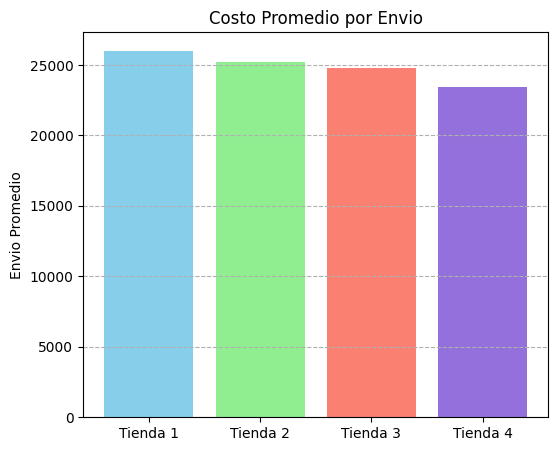

In [129]:
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
costo_prom_envio_tienda = [costo_prom_envio_tienda1, costo_prom_envio_tienda2, costo_prom_envio_tienda3, costo_prom_envio_tienda4]

plt.figure(figsize=(6,5))
plt.bar(tiendas, costo_prom_envio_tienda, color=['skyblue', 'lightgreen', 'salmon', 'mediumpurple'])


plt.title('Costo Promedio por Envio')
plt.ylabel('Envio Promedio')
plt.grid(True, axis='y', linestyle='--')
plt.show()


In [132]:
#ganancia x venta
ganancia_x_venta_tienda1 = ticket_promedio_tienda1 - costo_prom_envio_tienda1
ganancia_x_venta_tienda2 = ticket_promedio_tienda2 - costo_prom_envio_tienda2
ganancia_x_venta_tienda3 = ticket_promedio_tienda3 - costo_prom_envio_tienda3
ganancia_x_venta_tienda4 = ticket_promedio_tienda4 - costo_prom_envio_tienda4
print(f"El ticket promedio de la Tienda 1 es: ${ganancia_x_venta_tienda1:,.2f}")
print(f"El ticket promedio de la Tienda 2 es: ${ganancia_x_venta_tienda2:,.2f}")
print(f"El ticket promedio de la Tienda 3 es: ${ganancia_x_venta_tienda3:,.2f}")
print(f"El ticket promedio de la Tienda 4 es: ${ganancia_x_venta_tienda4:,.2f}")



El ticket promedio de la Tienda 1 es: $461,849.30
El ticket promedio de la Tienda 2 es: $448,011.19
El ticket promedio de la Tienda 3 es: $440,654.09
El ticket promedio de la Tienda 4 es: $416,903.43


In [163]:
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

todas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Asegurar formato de fecha y extraer "AñoMes"
todas['Fecha de Compra'] = pd.to_datetime(todas['Fecha de Compra'], dayfirst=True)
todas['AñoMes'] = todas['Fecha de Compra'].dt.to_period('M').astype(str)

# Agrupar por mes y tienda → contar ventas
ingresos_mensuales = todas.groupby(['AñoMes', 'Tienda'])['Precio'].sum().reset_index()

# Pivot para graficar
ingresos_pivot = ingresos_mensuales.pivot(index='AñoMes', columns='Tienda', values='Precio')

print(ingresos_pivot)


Tienda     Tienda 1    Tienda 2    Tienda 3    Tienda 4
AñoMes                                                 
2020-01  33084300.0  31129500.0  23782900.0  19298700.0
2020-02  40054000.0  17388800.0  27577000.0  22880400.0
2020-03  31562300.0  30515900.0  30024400.0  28533100.0
2020-04  33666100.0  27646600.0  35343500.0  39492700.0
2020-05  38582900.0  25462300.0  26123800.0  31991400.0
2020-06  26296700.0  26056100.0  17464300.0  26853200.0
2020-07  35085500.0  23547500.0  33602800.0  26925000.0
2020-08  31126500.0  23472800.0  25875600.0  31207300.0
2020-09  30243800.0  31128300.0  26668600.0  28200000.0
2020-10  21134300.0  33268700.0  18557200.0  17697900.0
2020-11  19869300.0  22568500.0  22868100.0  35240900.0
2020-12  28227500.0  28281600.0  33819300.0  22527100.0
2021-01  25554000.0  29163400.0  22662300.0  23525300.0
2021-02  32617700.0  27294500.0  20260400.0  30997700.0
2021-03  29348500.0  24646200.0  27970100.0  37961700.0
2021-04  22637300.0  32978600.0  24791900.0  401

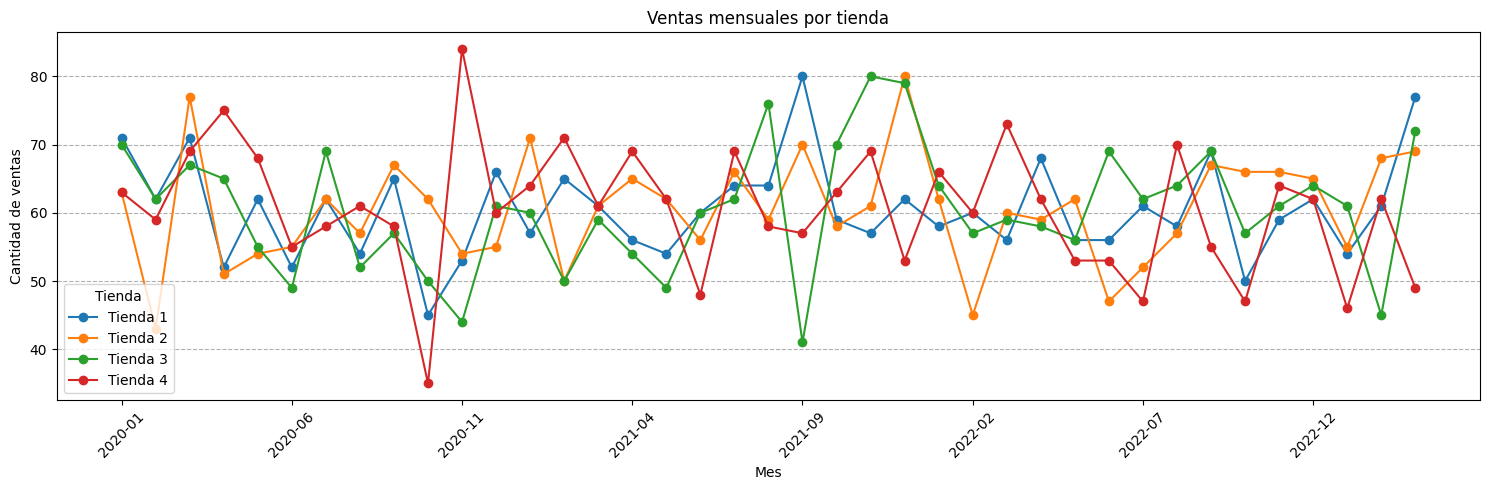

In [164]:
ventas_pivot.plot(kind='line', marker='o', figsize=(15, 5))
plt.title('Ventas mensuales por tienda')
plt.xlabel('Mes')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

In [155]:
calificacion_mensual = todas.groupby(['AñoMes', 'Tienda'])['Calificación'].mean().reset_index()
calif_pivot = calificacion_mensual.pivot(index='AñoMes', columns='Tienda', values='Calificación')


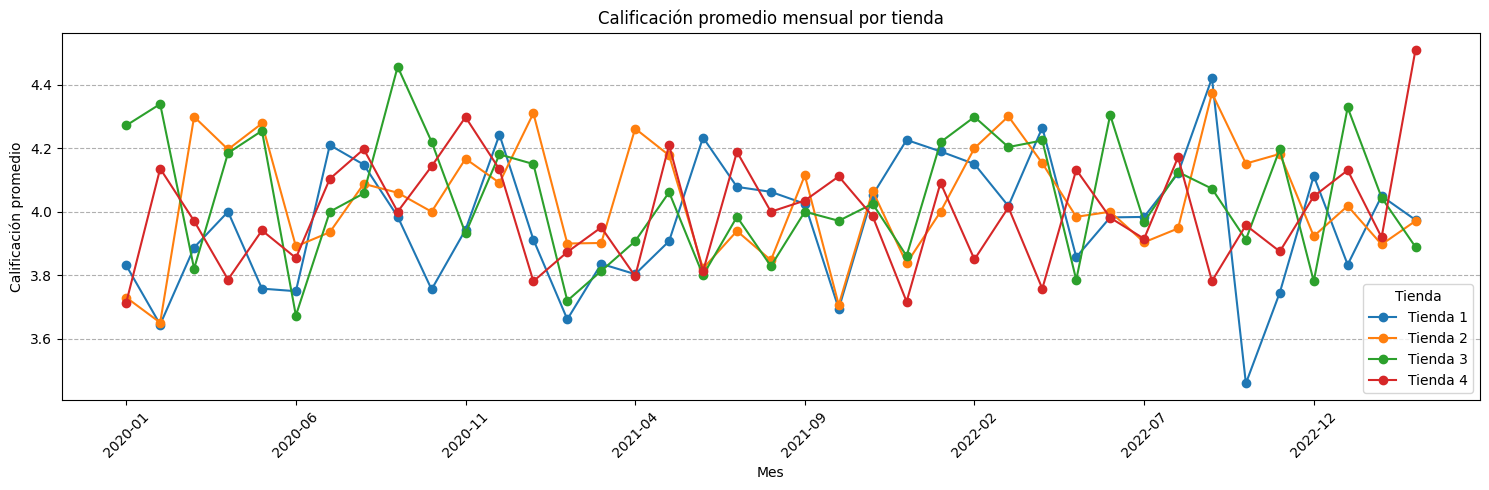

In [159]:
calif_pivot.plot(kind='line', marker='o', figsize=(15, 5))
plt.title('Calificación promedio mensual por tienda')
plt.xlabel('Mes')
plt.ylabel('Calificación promedio')
plt.grid(True, axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

Informe: De acuerdo a la informacion recolectada en los informes anteriores, se recomienda el cierre de la Tienda 4.
Esta decision se basa en los siguientes puntos:

*   Tendencia descendente en la facturacion mensual
*   A pesar de que su calificacion mensual, tiene una tendencia ascendete, sigue siendo baja, estando en 3er lugar
*   Aunque su costo de envío es el mas bajo, su ticket promedio, tambien lo es, lo que hace que sus ingresos sean los mas bajos de las 4 tiendas

Esto la convierte en la tienda que tiene el menor desempeño actual y tambien el menor potencial de crecimiento.

Atte, Sebastian Ravenna



